In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('./Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
details = df.info()
details


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [4]:
description = df.describe()
description

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [5]:
x = df['CGPA'].values
x

array([9.65, 8.87, 8.  , 8.67, 8.21, 9.34, 8.2 , 7.9 , 8.  , 8.6 , 8.4 ,
       9.  , 9.1 , 8.  , 8.2 , 8.3 , 8.7 , 8.  , 8.8 , 8.5 , 7.9 , 8.4 ,
       9.5 , 9.7 , 9.8 , 9.6 , 8.8 , 7.5 , 7.2 , 7.3 , 8.1 , 8.3 , 9.4 ,
       9.6 , 9.8 , 9.2 , 8.4 , 7.8 , 7.5 , 7.7 , 8.  , 8.2 , 8.5 , 9.1 ,
       9.4 , 9.1 , 9.3 , 9.7 , 8.85, 8.4 , 8.3 , 7.9 , 8.  , 8.1 , 8.  ,
       7.7 , 7.4 , 7.6 , 6.8 , 8.3 , 8.1 , 8.2 , 8.2 , 8.5 , 8.7 , 8.92,
       9.02, 8.64, 9.22, 9.16, 9.64, 9.76, 9.45, 9.04, 8.9 , 8.56, 8.72,
       8.22, 7.54, 7.36, 8.02, 9.5 , 9.22, 9.36, 9.45, 8.66, 8.42, 8.28,
       8.14, 8.76, 7.92, 7.66, 8.03, 7.88, 7.66, 7.84, 8.  , 8.96, 9.24,
       8.88, 8.46, 8.12, 8.25, 8.47, 9.05, 8.78, 9.18, 9.46, 9.38, 8.64,
       8.48, 8.68, 8.34, 8.56, 8.45, 9.04, 8.62, 7.46, 7.28, 8.84, 9.56,
       9.48, 8.36, 8.22, 8.47, 8.66, 9.32, 8.71, 9.1 , 9.35, 9.76, 8.65,
       8.56, 8.78, 9.28, 8.77, 8.45, 8.16, 9.08, 9.12, 9.15, 9.36, 9.44,
       9.92, 8.96, 8.64, 8.48, 9.11, 9.8 , 8.26, 9.

In [6]:
y = df['Chance of Admit '].values
y

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.65, 0.63, 0.62, 0.64, 0.7 ,
       0.94, 0.95, 0.97, 0.94, 0.76, 0.44, 0.46, 0.54, 0.65, 0.74, 0.91,
       0.9 , 0.94, 0.88, 0.64, 0.58, 0.52, 0.48, 0.46, 0.49, 0.53, 0.87,
       0.91, 0.88, 0.86, 0.89, 0.82, 0.78, 0.76, 0.56, 0.78, 0.72, 0.7 ,
       0.64, 0.64, 0.46, 0.36, 0.42, 0.48, 0.47, 0.54, 0.56, 0.52, 0.55,
       0.61, 0.57, 0.68, 0.78, 0.94, 0.96, 0.93, 0.84, 0.74, 0.72, 0.74,
       0.64, 0.44, 0.46, 0.5 , 0.96, 0.92, 0.92, 0.94, 0.76, 0.72, 0.66,
       0.64, 0.74, 0.64, 0.38, 0.34, 0.44, 0.36, 0.42, 0.48, 0.86, 0.9 ,
       0.79, 0.71, 0.64, 0.62, 0.57, 0.74, 0.69, 0.87, 0.91, 0.93, 0.68,
       0.61, 0.69, 0.62, 0.72, 0.59, 0.66, 0.56, 0.45, 0.47, 0.71, 0.94,
       0.94, 0.57, 0.61, 0.57, 0.64, 0.85, 0.78, 0.84, 0.92, 0.96, 0.77,
       0.71, 0.79, 0.89, 0.82, 0.76, 0.71, 0.8 , 0.78, 0.84, 0.9 , 0.92,
       0.97, 0.8 , 0.81, 0.75, 0.83, 0.96, 0.79, 0.

In [7]:
x = x.reshape(-1,1)


Text(0, 0.5, 'Chance of Admit')

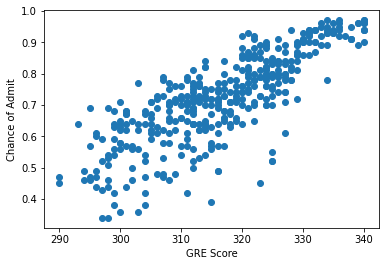

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.4,test_size=0.6,random_state=100)
plt.scatter(df['GRE Score'],df['Chance of Admit '])
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 100)
x_train

array([[8.  ],
       [8.53],
       [9.4 ],
       [8.85],
       [8.64],
       [8.77],
       [8.22],
       [9.34],
       [9.62],
       [8.2 ],
       [9.76],
       [9.12],
       [8.74],
       [9.32],
       [9.04],
       [9.11],
       [8.66],
       [7.9 ],
       [9.01],
       [8.  ],
       [9.87],
       [8.89],
       [8.06],
       [8.27],
       [7.3 ],
       [8.34],
       [9.12],
       [8.6 ],
       [8.02],
       [8.5 ],
       [8.68],
       [8.43],
       [9.04],
       [8.43],
       [8.12],
       [8.87],
       [8.66],
       [8.12],
       [9.08],
       [7.64],
       [8.2 ],
       [8.64],
       [8.88],
       [8.37],
       [8.34],
       [7.8 ],
       [9.08],
       [9.26],
       [9.22],
       [9.36],
       [9.1 ],
       [8.45],
       [7.9 ],
       [9.14],
       [8.04],
       [7.65],
       [8.5 ],
       [9.17],
       [7.89],
       [8.73],
       [9.14],
       [8.27],
       [8.28],
       [8.74],
       [7.7 ],
       [9.5 ],
       [9.

Text(0, 0.5, 'Salary in $')

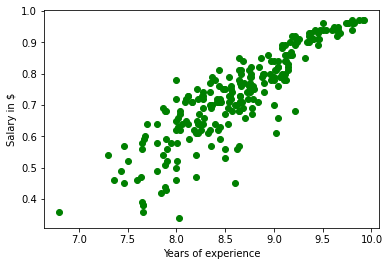

In [10]:
%matplotlib inline
plt.scatter(x_train, y_train, color='green')
plt.xlabel('Years of experience')
plt.ylabel('Salary in $')

In [11]:
model = LinearRegression()


In [12]:
model.fit(x_train, y_train)

LinearRegression()

In [13]:
y_predict = model.predict(x_test)
print(f"Train accuracy {round(model.score(x_train,y_train)*100,2)} %")
print(f"Test accuracy {round(model.score(x_test,y_test)*100,2)} %")

Train accuracy 76.41 %
Test accuracy 75.96 %


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

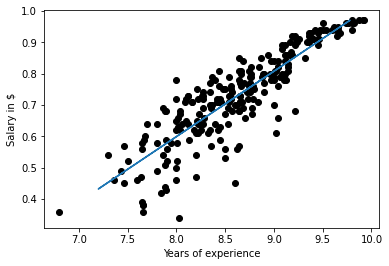

In [14]:
plt.scatter(x_train, y_train, color = 'black')
plt.plot(x_test, y_predict)
plt.xlabel('Years of experience')
plt.ylabel('Salary in $')
plt.plot


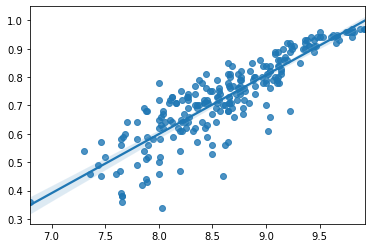

In [15]:

sns.regplot(x=x_train, y=y_train, order=1)
sns.set_theme(style='darkgrid')

In [16]:

r2_score(y_test, y_predict)*100

75.95894166934923